Math 画图测试

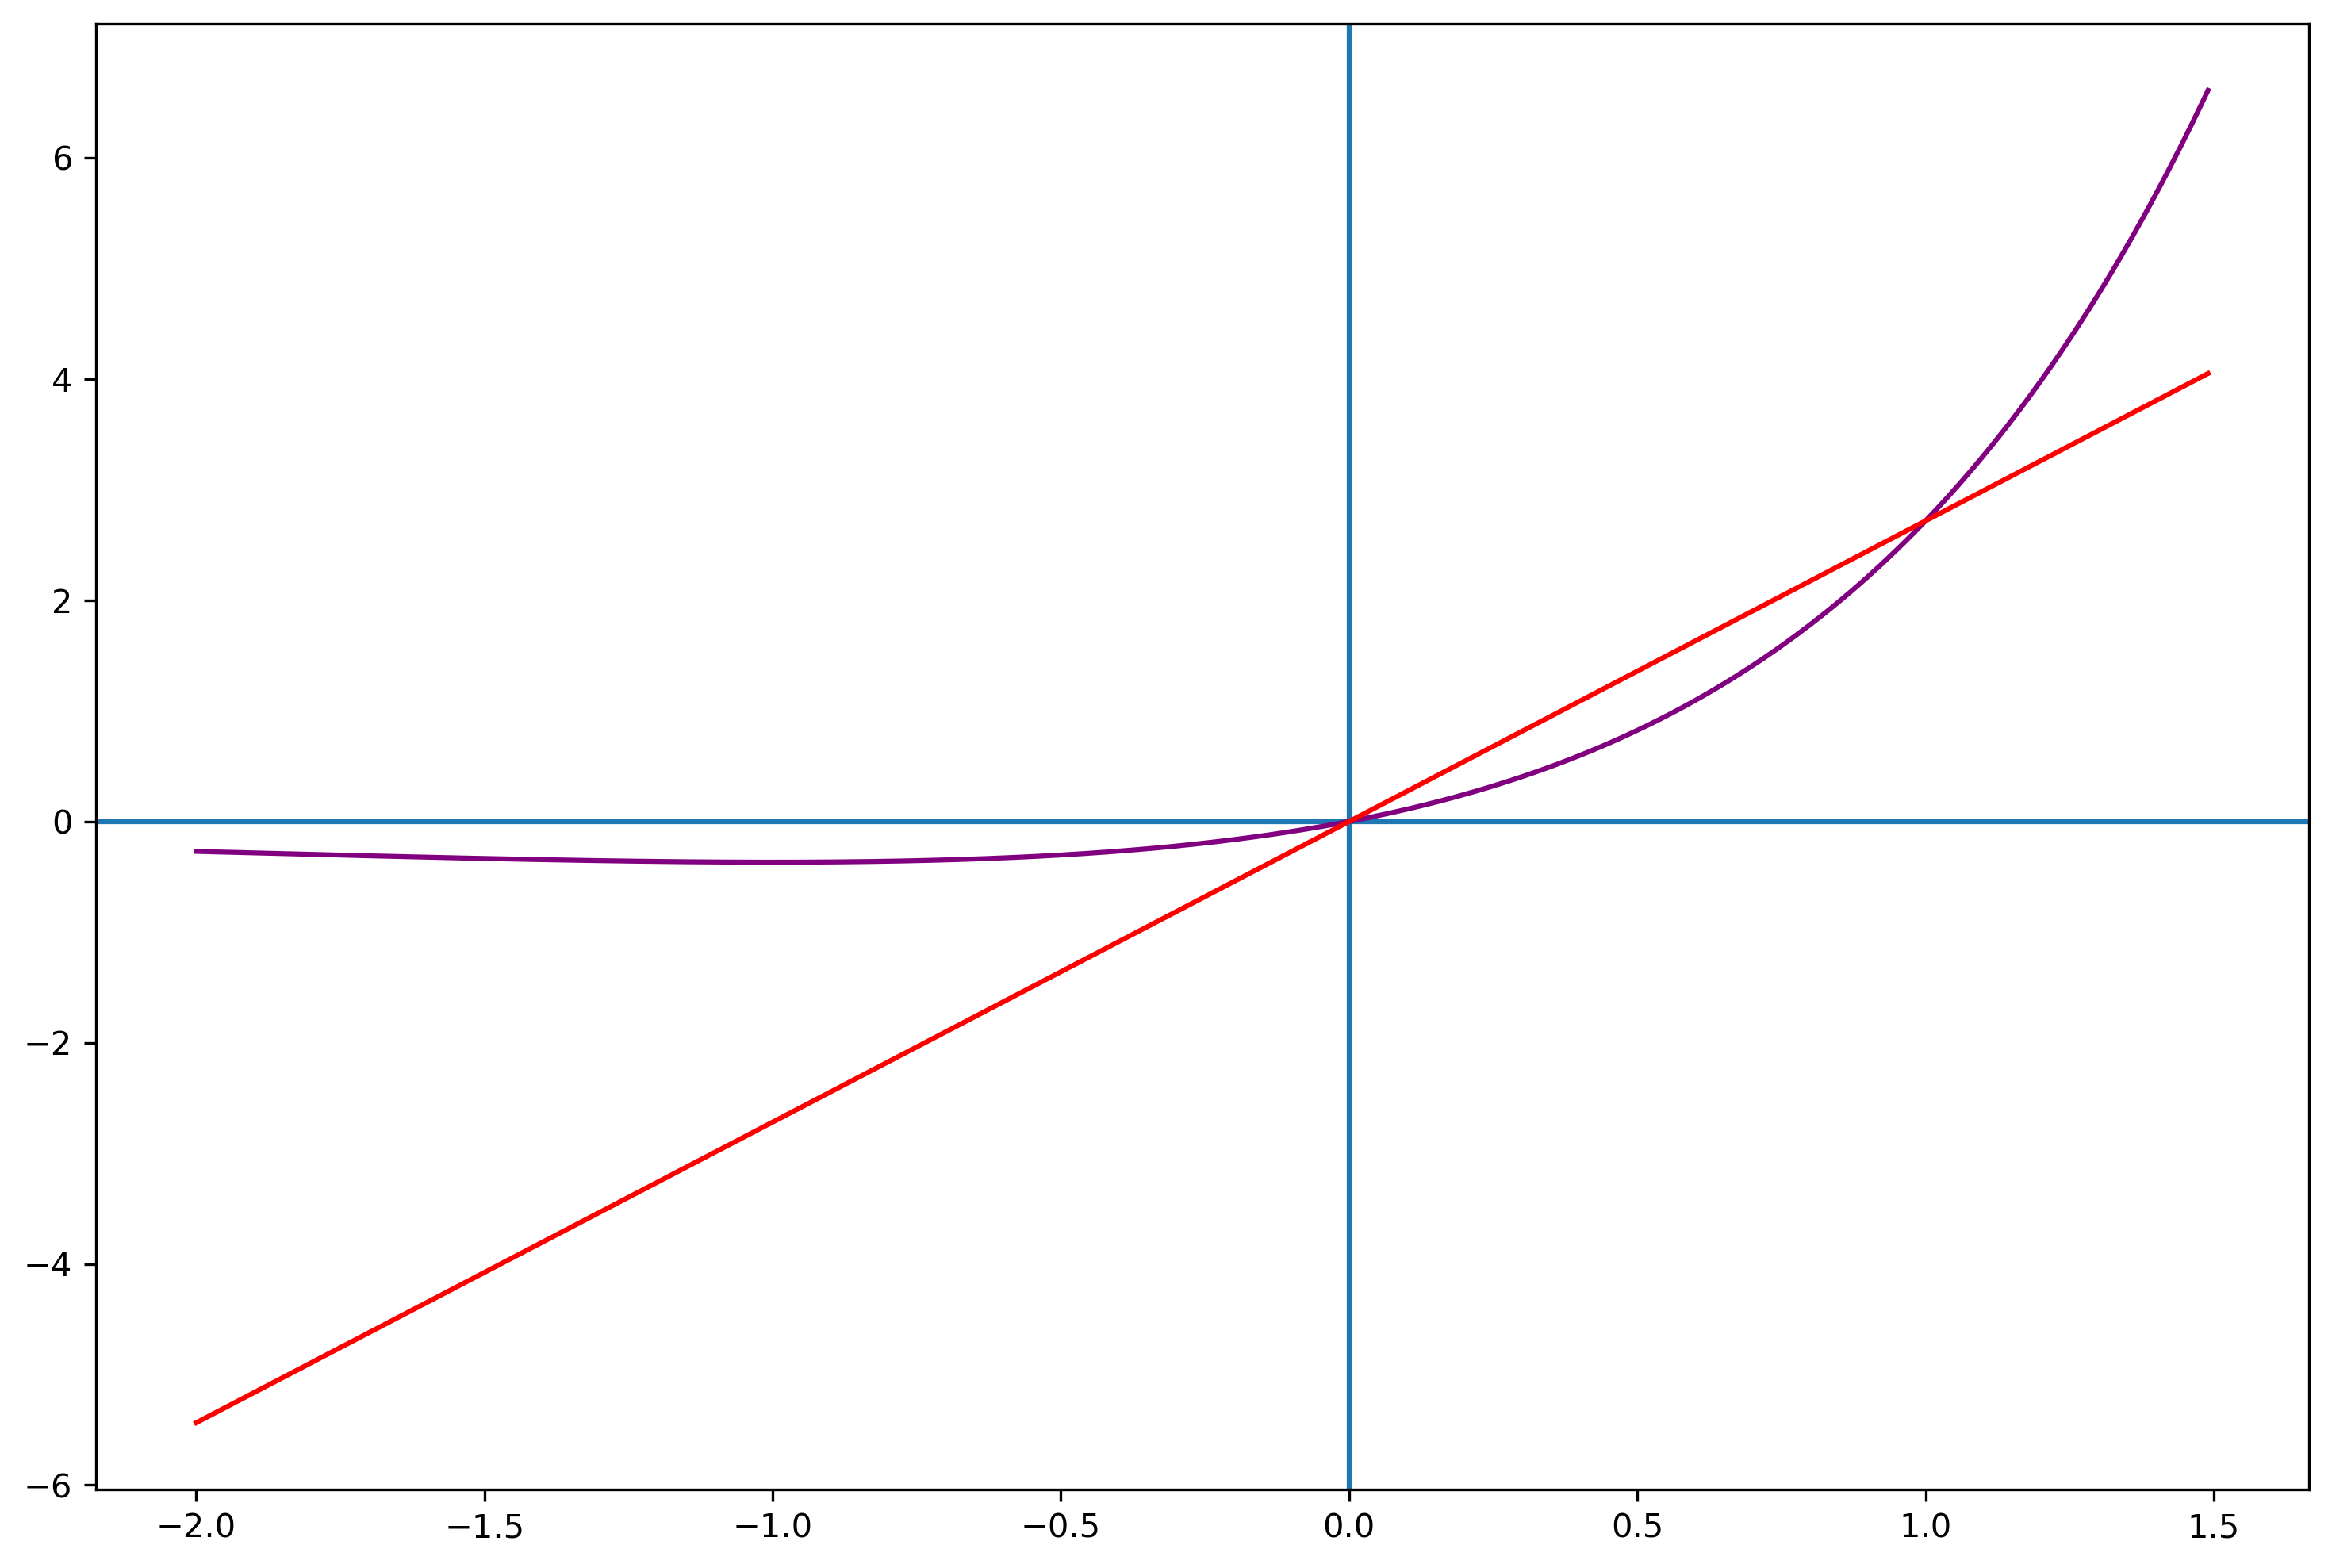

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

plt.figure(figsize=(12, 8), dpi=300)

x = np.arange(-2, 1.5, 0.01)
y1 = []
y2 = []
for t in x:
    a = t * math.exp(t)
    y1.append(a)

for t in x:
    a = t * math.exp(1)
    y2.append(a)

plt.axvline(0)
plt.axhline(0)
plt.plot(x, y1, color="purple")
plt.plot(x, y2, color="red")

OpenAI 开源项目 whisper 测试

In [ ]:
import whisper

model = whisper.load_model("large-v3")

result = model.transcribe("")

print(result["text"])

箱型图按边界值平滑

In [ ]:
import numpy as np
import pandas as pd
import math

# 要处理的数据
x = np.array([60, 65, 63, 66, 67, 69, 71, 72, 74, 76, 77, 82, 84, 87, 90])
# 对数据排序
x.sort()
# 定义等区间
bins = [60, 70, 80, 90, 100]
# 对数据按区间分段，right=False代表区间左闭右开
x_cuts = pd.cut(x, bins, right=False)
# number数组即为每个区间的数据数量
number = x_cuts.value_counts().values
# 取所有区间中最大的数据数量
rows = number.max()

number

In [ ]:
# 定义初始化等宽箱
widthList = np.full([4, rows], 0)
size = x.size
# 将要处理的数据x按照等宽分箱法分箱
i = 0
for a in range(0, 4):
    for b in range(0, number[a]):
        widthList[a, b] = x[i]
        i = i + 1
# 划分后的等宽箱，非零值
widthList

In [ ]:
print(widthList, "\n")

# 按平均值平滑，初始化mean_width
mean_width = np.full([4, rows], 0)
# 等宽分箱法、均值平滑技术
for i in range(0, 4):
    for j in range(0, number[i]):
        # 第i行算数平均值
        mean_width[i][j] = int(widthList[i].sum() / number[i])
# 按平均值平滑后的等宽箱
print(mean_width)

In [ ]:
print(widthList, "\n")

# 定义等深箱每行左边界
edgeLeft = np.arange(4)
# 定义等深箱每行右边界
edgeRight = np.arange(4)
# 按边界值平滑，初始化edge_width
edge_width = np.full([4, rows], 0)
# 等宽分箱法、边界值平滑技术
# 遍历等宽箱行
for i in range(0, 4):
    # 第i行左边界
    edgeLeft[i] = widthList[i][0]
    # 第i行右边界
    edgeRight[i] = widthList[i][number[i] - 1]
    # 遍历等宽箱列
    for j in range(0, number[i]):
        # 第一列，即左边界
        if j == 0:
            edge_width[i][j] = widthList[i][0]
        # 等深箱最后一列，即右边界
        if j == (number[i] - 1):
            edge_width[i][j] = widthList[i][number[i] - 1]
        else:
            # 判断距离左边界近还是距离右边界近
            if math.pow((edgeLeft[i] - widthList[i][j]), 2) > math.pow(
                (edgeRight[i] - widthList[i][j]), 2
            ):
                print(
                    "row_index ",
                    i,
                    " column_index ",
                    j,
                    " 原始值",
                    widthList[i][j],
                    " 被修改为右边界",
                    edgeRight[i],
                )
                edge_width[i][j] = edgeRight[i]
            else:
                print(
                    "row_index ",
                    i,
                    " column_index ",
                    j,
                    " 原始值",
                    widthList[i][j],
                    " 被修改为左边界",
                    edgeLeft[i],
                )
                edge_width[i][j] = edgeLeft[i]

print(edge_width)

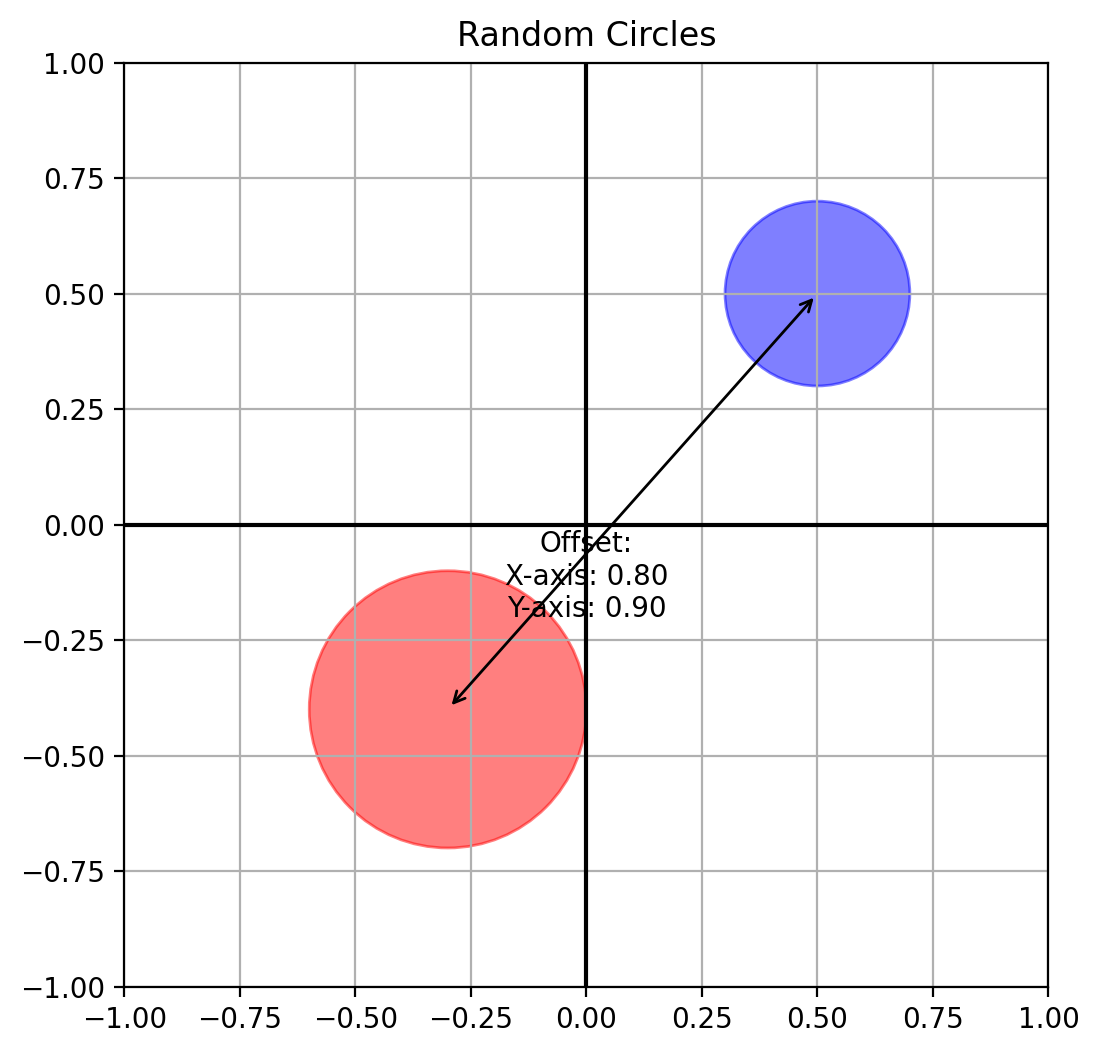

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 设置图形的大小和分辨率（ppi）
fig = plt.figure(figsize=(6, 6), dpi=200)

# 创建坐标轴
ax = fig.add_subplot(111, aspect='equal')

# 绘制坐标轴
ax.axhline(y=0, color='k')  # 绘制水平线
ax.axvline(x=0, color='k')  # 绘制垂直线

# 生成两个随机圆的参数
circle1_center = (0.5, 0.5)
circle1_radius = 0.2
circle1 = plt.Circle(circle1_center, circle1_radius, color='blue', alpha=0.5)  # 圆心为(0.5, 0.5)，半径为0.2，蓝色

circle2_center = (-0.3, -0.4)
circle2_radius = 0.3
circle2 = plt.Circle(circle2_center, circle2_radius, color='red', alpha=0.5)  # 圆心为(-0.3, -0.4)，半径为0.3，红色

# 将圆添加到坐标轴上
ax.add_artist(circle1)
ax.add_artist(circle2)

# 计算圆心之间的偏移量
offset_x = circle1_center[0] - circle2_center[0]
offset_y = circle1_center[1] - circle2_center[1]

# 添加连接线和偏移量标签
arrow_props = dict(facecolor='black', arrowstyle='<->')

# 连接线段
ax.annotate('', xy=circle1_center, xytext=circle2_center, arrowprops=arrow_props)

# 添加偏移量标签
ax.annotate(f'Offset:\nX-axis: {offset_x:.2f}\nY-axis: {offset_y:.2f}',
            xy=((circle1_center[0] + circle2_center[0]) / 2, circle2_center[1]),
            xytext=(0, -0.2),
            ha='center', fontsize=10)

# 设置坐标轴的范围
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# 设置图形标题和显示
ax.set_title('Random Circles')

# 显示网格
ax.grid(True)

# 显示图形
plt.show()